In [117]:
import otter
grader = otter.Notebook()

# Homework 12: Advanced operations in pandas

## Due Date: Monday, May 1st, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with other students please include their names below.

**Collaborators:** *list collaborators here*

## Grading

Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests. **For autograded probability questions, the provided tests will only check that your answer is within a reasonable range.**

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, make sure to be as descriptive as possible: include titles, axes labels, and units wherever applicable.

In [118]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

'imports completed'

'imports completed'

## Introduction

The purpose of this module is to expand your 'pandas' skillset by performing various new and old operations on 'pandas' dataframes. A lot of these operations will be things you've done before in the `datascience` package, so you should reference the included notebook to translate between the two if need be.

You are expected to answer all relevant questions programatically *i.e.* use indexing and functions/methods to arrive to your answers. Your answers don't need to be in one single line, you may use as many intermediate steps as you need. 

### Question 1

Reading in data from file is made easy in the `pandas` package. We have included two datasets in your assignment folder to read in, 'broadway.csv' and 'diseases.txt'. 

#### Question 1.1

Read in broadway using `pd.read_csv`.

In [119]:
broadway = pd.read_csv('broadway.csv')
broadway.head(6)

,Day,Month,Year,Show.Name,Theatre,Show.Type,Attendance,Capacity,Gross,Gross Potential,Performances
0,26,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4
5,21,4,1991,Miss Saigon,Broadway,Musical,14076,101,706793,0,8


In [120]:
grader.check("q1_1")

q1_1 results: All test cases passed!

#### Question 1.2

Now read in the diseases dataset. Diseases is not a `.csv` but a `.txt` file *i.e.* a plain-text file. Because it's not `.csv`, we can't assume that the values are comma separated. Fortunately `pd.read_csv` can be used on any file. It may not parse the data correctly, but it may reveal the values that do separate entries. 

Identify the separator used in `diseases.txt` and use it to successfully read in your data with `pd.read_csv`.

In [121]:
separator = '\t'
diseases = pd.read_csv("diseases.txt", sep = separator)
diseases.head(6)

,disease,loc,number,population,year
0,MEASLES,ALABAMA,8843,2640000,1928
1,MEASLES,ARIZONA,847,422000,1928
2,MEASLES,ARKANSAS,8899,1847000,1928
3,MEASLES,CALIFORNIA,3698,5344000,1928
4,MEASLES,COLORADO,2099,1014000,1928
5,MEASLES,CONNECTICUT,10014,1577000,1928


In [122]:
grader.check("q1_2")

q1_2 results: All test cases passed!

#### Question 1.3

Read in the the DataFrame called **nst-est2016-alldata.csv** from the course Github. The url path to the repository is https://github.com/oregon-data-science/DSCI101/raw/main/data/. You should do this with `pd.read_csv`.

In [123]:
pop_census = pd.read_csv('https://github.com/oregon-data-science/DSCI101/raw/main/data/' + 'nst-est2016-alldata.csv')

In [124]:
grader.check("q1_3")

q1_3 results: All test cases passed!

This DataFrame gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)!

The raw data is a bit messy - run the cell below to clean the DataFrame and make it easier to work with.

In [125]:
# Don't change this cell; just run it.
pop_sum_level = pop_census['SUMLEV'] == 40
pop = pop_census[pop_sum_level]

# grab a numbered list of columns to use
columns_to_use = pop.columns[[1, 4, 12, 13, 27, 34, 62, 69]]
pop = pop[columns_to_use] 

pop = pop.rename(columns={'POPESTIMATE2015': '2015',
                          'POPESTIMATE2016': '2016',
                          'BIRTHS2016': 'BIRTHS',
                          'DEATHS2016': 'DEATHS',
                          'NETMIG2016': 'MIGRATION',
                          'RESIDUAL2016': 'OTHER'
                        })
#pop['REGION'].unique()
pop['REGION'] = pop['REGION'].replace({'1':1, '2':2, '3':3, '4':4, 'X':0})
pop.head(12)

,REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
5,3,Alabama,4853875,4863300,58556,52405,3874,-600
6,4,Alaska,737709,741894,11255,4511,-2557,-2
7,4,Arizona,6817565,6931071,87204,56564,76405,6461
8,3,Arkansas,2977853,2988248,37936,30581,3530,-490
9,4,California,38993940,39250017,502848,273850,33530,-6451
10,4,Colorado,5448819,5540545,67453,37121,60773,621
11,1,Connecticut,3584730,3576452,35848,30638,-12822,-666
12,3,Delaware,944076,952065,10922,8945,5583,429
13,3,District of Columbia,670377,681170,9779,5455,6392,77
14,3,Florida,20244914,20612439,222793,201485,325986,20231


### Question 2 - Census data

**Question 2.1** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

In [194]:
us_birth_rate = float(pop['BIRTHS'].sum() / pop['2015'].sum())
us_birth_rate

0.012358536498646102

In [195]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2** Assign `movers` to the number of states for which the **absolute value** (`np.abs`) of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [128]:
migrate = np.abs(pop['MIGRATION']) / pop['2015'].sum() > 0.01
movers = pop[migrate].shape[0]
movers

0

In [129]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).

In [130]:
west_births = sum(pop[pop['REGION'] == 4]['BIRTHS'])
west_births

979657

In [131]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

In [132]:
less_than_west_births = pop[pop['2016'] < west_births].shape[0]
less_than_west_births

7

In [133]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

In [134]:
visualization = 2

In [135]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6** In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate DataFrame here.

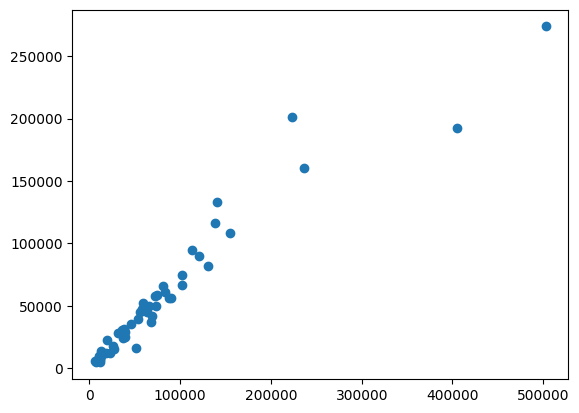

In [136]:
# Generate your chart in this cell
fig, ax = plt.subplots()

ax.scatter(x = pop['BIRTHS'], y = pop["DEATHS"])

### Question 3 - The diseases dataset

The U.S., as in many places, was once afflicted by many diseases (many of them viruses) that are no longer prominent today due to the advent of vaccines. Some of them such as Polio have been effectively eradicated while others like Measles affect so few individuals that they are largely irrelevant in the public health landscape. Notably, even though many of these diseases persist in the population (*e.g.* measles, mumps and rubella), they are sufficiently diluted by uninfected and/or vaccinated individuals to undermine any potential for an outbreak.

#### Question 3.1

How many different diseases are represented in this dataset?

In [137]:
num_diseases = diseases['disease'].unique().shape[0]
num_diseases

7

In [138]:
grader.check("q3_1")

q3_1 results: All test cases passed!

In [139]:
diseases.head()

,disease,loc,number,population,year
0,MEASLES,ALABAMA,8843,2640000,1928
1,MEASLES,ARIZONA,847,422000,1928
2,MEASLES,ARKANSAS,8899,1847000,1928
3,MEASLES,CALIFORNIA,3698,5344000,1928
4,MEASLES,COLORADO,2099,1014000,1928


#### Question 3.2

We have disease prevalence in terms of total individuals infected in a year in a state. The absolute magnitude of infected individuals can be helpful, but it'll be easier to directly compare between diseases and states if we weight these values by total population. Create a new column in diseases called "incidence_per" representing the disease incidence ("number") as a percent of the state's population. 

*Hint*: If the variable is represented as a percent, then it should be between 0 and 100. 

In [140]:
diseases["incidence_per"] = diseases['number'] / diseases['population']
diseases.head()

,disease,loc,number,population,year,incidence_per
0,MEASLES,ALABAMA,8843,2640000,1928,0.003350
1,MEASLES,ARIZONA,847,422000,1928,0.002007
2,MEASLES,ARKANSAS,8899,1847000,1928,0.004818
3,MEASLES,CALIFORNIA,3698,5344000,1928,0.000692
4,MEASLES,COLORADO,2099,1014000,1928,0.002070


In [141]:
grader.check("q3_2")

q3_2 results: All test cases passed!

#### Question 3.3

Using this new column you created, identify the disease that afflicted the greatest percentage of New York's population in 1928. Provide your answer as a string. 

In [142]:
nydiseases = diseases[(diseases['loc'] == 'NEW YORK') & (diseases['year'] == 1928)]
worst_ny_disease_1928 = nydiseases.sort_values('incidence_per', ascending=False).iloc[0, 0]
worst_ny_disease_1928

'MEASLES'

In [143]:
grader.check("q3_3")

q3_3 results: All test cases passed!

#### Question 3.4

Between the years 1928 and 1938 inclusive, which U.S. state had the highest average incidence of polio as a percentage of its total population?

In [144]:
betweenyears = diseases[(diseases['year'] >= 1928) & (diseases['year'] <= 1938) & (diseases['disease'] == 'POLIO')]
worst_polio_state = betweenyears.sort_values('incidence_per', ascending=False).iloc[0,1]
worst_polio_state

'CONNECTICUT'

In [145]:
grader.check("q3_4")

q3_4 results: All test cases passed!

#### Question 3.5

Identify the **first** year in which Polio was effectively eradicated in the US (fewer than 100 total cases). 

In [175]:
poliodisease = diseases[diseases['disease'] == 'POLIO'].groupby('year').sum()
first_year_eradicated = poliodisease[poliodisease['number'] < 100].sort_values('number', ascending=False).reset_index().iloc[0,0]
first_year_eradicated

C:\Users\owenf\AppData\Local\Temp\ipykernel_9440\1512850212.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  poliodisease = diseases[diseases['disease'] == 'POLIO'].groupby('year').sum()


1966

In [176]:
grader.check("q3_5")

q3_5 results: All test cases passed!

Measles is a highly infectious viral disease that, historically, was once one of the most prominent childhood illnesses globally.

Prior to the development of a vaccine for measles, it was more or less a fact of life for children. The disease was a constant blight that perpetuated itself in large boom-bust cycles of disease outbreaks. However, the first measles vaccine was approved for distribution in 1963, which would have dramatic consequences for the future of measles' presence in the public-health landscape. 

The $R_0$ of a disease represents how many people we can expect to be infected by a single contagious individual under average conditions in a uniformly susceptible population (no vaccinations or aquired immunity). Measles has an $R_0$ = 18 - an incredibly high value that indicates it is among the most infectious diseases that affect humans. For reference, the $R_0$ for a typical year's flu is 1. 

![R_0 for multiple human diseases](./r_0.jpg)

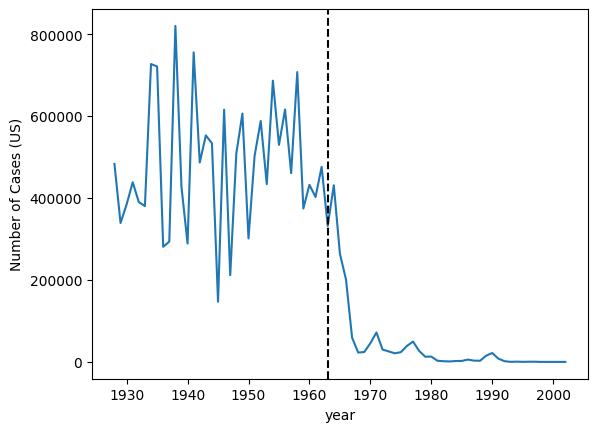

In [177]:
measles_sum = diseases[diseases["disease"] == "MEASLES"].groupby(["year"]).sum("number").reset_index()
                   
sns.lineplot(data = measles_sum, x = "year", y = "number")
plt.ylabel("Number of Cases (US)")
plt.axvline(x = 1963, color = "black", linestyle = "dashed");

Clearly the MMR vaccine was incredibly successful at reducing and eventually eliminating Measles outbreaks. 

### Question 4 - The broadway dataset

The broadway dataset contains all plays put into production on Broadway between the years 1990 and 2016.

In [178]:
print(f"Over this time period there were {len(broadway['Show.Name'].unique())} different shows put on Broadway.")

Over this time period there were 820 different shows put on Broadway.


That's a lot of shows! Presumably there were some hits and some duds. Let's separate the wheat from the chaff and identify those shows that performed the best. But how do we define best?

#### Question 4.1

In [179]:
broadway.head(5)

,Day,Month,Year,Show.Name,Theatre,Show.Type,Attendance,Capacity,Gross,Gross Potential,Performances,date_continuous
0,26,8,1990,Tru,Booth,Play,5500,88,134456,0,8,Ellipsis
1,24,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0,Ellipsis
2,31,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0,Ellipsis
3,7,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0,Ellipsis
4,14,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4,Ellipsis


Create a **Series** of plays in order of most to least total gross. 

In [182]:
broadway_grosses = broadway.groupby('Show.Name').sum().sort_values('Gross', ascending=False).reset_index()['Show.Name']
broadway_grosses

C:\Users\owenf\AppData\Local\Temp\ipykernel_9440\3256751959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  broadway_grosses = broadway.groupby('Show.Name').sum().sort_values('Gross', ascending=False).reset_index()['Show.Name']


0                             The Lion King
1                                    Wicked
2                  The Phantom Of The Opera
3                                Mamma Mia!
4                                   Chicago
                       ...                 
815    Jackie Mason:  Politically Incorrect
816                    The Play'S The Thing
817                      School For Scandal
818                     Buttons On Broadway
819                            A Mom'S Life
Name: Show.Name, Length: 820, dtype: object

In [183]:
grader.check("q4_1")

q4_1 results: All test cases passed!

#### Question 4.2

Now create a **Series** of plays in order of most to least average amount grossed *per* seat filled (Gross / Attendance)

In [184]:
broadway['gross per seat'] = broadway['Gross'] / broadway['Attendance']
broadway_gross_seat = broadway.groupby('Show.Name').sum().sort_values('gross per seat', ascending=False).reset_index()['Show.Name']
broadway_gross_seat

C:\Users\owenf\AppData\Local\Temp\ipykernel_9440\3477893330.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  broadway_gross_seat = broadway.groupby('Show.Name').sum().sort_values('gross per seat', ascending=False).reset_index()['Show.Name']


0                      The Lion King
1                             Wicked
2                            Chicago
3           The Phantom Of The Opera
4                        Jersey Boys
                   ...              
815                              Tru
816                    Eugene Onegin
817    Chronicle Of A Death Foretold
818           Danny Gans On Broadway
819              Buttons On Broadway
Name: Show.Name, Length: 820, dtype: object

In [185]:
grader.check("q4_2")

q4_2 results: All test cases passed!

#### Question 4.3

Create a new variable representing date as a single continuous variable. This should combine year, month and day into a new column. Assume no leap years and that that there are 30.44 days per month. Call this variable `date_continuous`

*Hint*: Think about how you can convert months into days and days into the same units as years. 

In [187]:
broadway["date_continuous"] = (((30.44 * (broadway['Month'] - 1)) + broadway['Day']) / 365) + broadway['Year']
broadway[["Show.Name","date_continuous"]]

,Show.Name,date_continuous
0,Tru,1990.655014
1,Miss Saigon,1991.232548
2,Miss Saigon,1991.251726
3,Miss Saigon,1991.269370
4,Miss Saigon,1991.288548
...,...,...
31291,The Humans,2016.622137
31292,The Lion King,2016.622137
31293,The Phantom Of The Opera,2016.622137
31294,Waitress,2016.622137


In [188]:
grader.check("q4_3")

q4_3 results: All test cases passed!

With this variable created, we can now identify the show that has had the longest tenure on Broadway. To do this, we'll define our own function called `span`, which will return the difference between the max and minimum of a series. Using this function, we can find the length of time each show spent on Broadway and identify the longest running plays.

In [189]:
def span(series):
    return max(series) - min(series)

In [190]:
broadway_length = (broadway[["Show.Name", "date_continuous"]]
                   .groupby("Show.Name")
                   .agg(span)
                   .reset_index()
                   .rename({"date_continuous":"total_tenure_years"}, axis = 1)
                   .sort_values("total_tenure_years", ascending = False)
                  )

broadway_length.head()

,Show.Name,total_tenure_years
708,The Phantom Of The Opera,20.199671
155,Chicago,19.797589
682,The Lion King,18.819507
415,Mamma Mia!,13.933041
105,Beauty And The Beast,13.377425


#### Question 4.4

This is some handy information and we might find it useful to include the total tenure of a show in the original dataframe. Join the total tenure you just determined on the original broadway frame using the `merge` function, ensuring that the new column is called "total_tenure_years". Be sure that there is no information lost from the original dataframe in your new, joined dataframe. 

You should reference the help file for merge if you need guidance (`help(pd.merge)`). 

In [191]:
broadway_merged = broadway.merge(broadway_length)
broadway_merged.head()

,Day,Month,Year,Show.Name,Theatre,Show.Type,Attendance,Capacity,Gross,Gross Potential,Performances,date_continuous,gross per seat,total_tenure_years
0,26,8,1990,Tru,Booth,Play,5500,88,134456,0,8,1990.655014,24.446545,0.000000
1,24,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0,1991.232548,57.943005,9.844164
2,31,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0,1991.251726,52.173026,9.844164
3,7,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0,1991.269370,51.242942,9.844164
4,14,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4,1991.288548,52.308484,9.844164


In [192]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then upload your .ipynb file to Canvas assignment HW12

To double-check your work, the cell below will rerun all of the autograder tests.

In [196]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!